Plot the phase idagram for the Pokec social network for different linear field gradients of the background field. The data used in this notebook was generated in *figS4-simulations.ipynb*

Created: 04/10/20

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
phase_diag_data_all = pd.read_csv("Data/Pokec_phase_diagram_data.csv")
phase_diag_data_all.head()

,Unnamed: 0,Method,beta_factor,field_gradient,mean_mag,init
0,0,full_mf,0.1,1.0,0.000657,+VE
1,0,full_mf,0.1,1.0,0.000657,-VE
2,0,block_mf,0.1,1.0,0.000656,rand
3,0,block_mf,0.1,1.0,0.000656,rand
4,0,block_mf,0.1,1.0,0.000656,rand


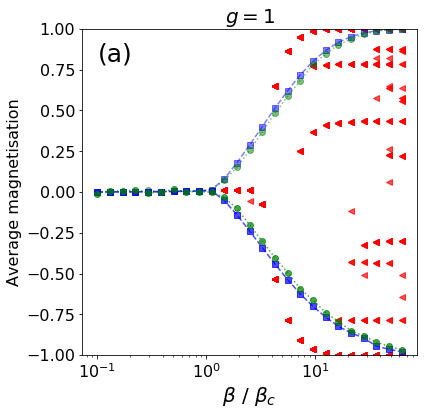

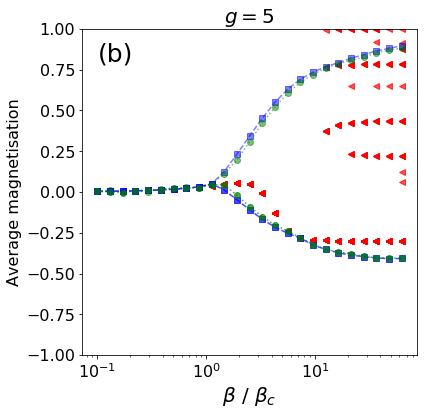

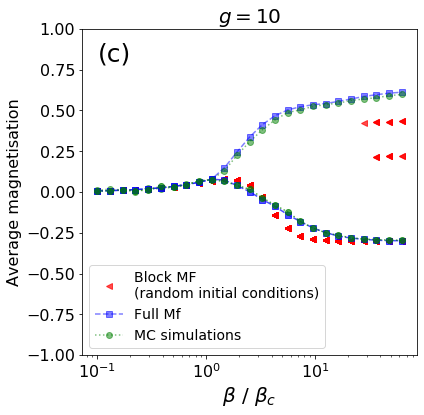

In [3]:
for label,gradient in zip(['(a)','(b)','(c)'],[1.0,5.0,10.0]) :

    phase_diag_data = phase_diag_data_all.loc[phase_diag_data_all['field_gradient']==gradient]

    block_mf_data = phase_diag_data.loc[phase_diag_data['Method']=='block_mf']

    plt.figure(figsize=(6,6))

    beta_vals_block = list(block_mf_data['beta_factor'])
    block_mf_vals = list(block_mf_data['mean_mag'])

    plt.plot(beta_vals_block,block_mf_vals,'r<',alpha=0.7,label='Block MF \n(random initial conditions)')

    #+VE
    full_mf_data= phase_diag_data.loc[ (phase_diag_data['Method']=='full_mf') & (phase_diag_data['init']=='+VE')]
    mc_data = phase_diag_data.loc[ (phase_diag_data['Method']=='MC_simulations') & (phase_diag_data['init']=='+VE')]
    beta_vals = list(full_mf_data['beta_factor'])
    full_mf_vals = list(full_mf_data['mean_mag'])
    plt.plot(beta_vals,full_mf_vals,'bs--',label='Full Mf',alpha=0.5)
    beta_vals = list(mc_data['beta_factor'])
    mc_mag_vals = list(mc_data['mean_mag'])
    plt.plot(beta_vals,mc_mag_vals,'go:',label='MC simulations',alpha=0.5)


    #-VE
    full_mf_data= phase_diag_data.loc[ (phase_diag_data['Method']=='full_mf') & (phase_diag_data['init']=='-VE')]
    mc_data = phase_diag_data.loc[ (phase_diag_data['Method']=='MC_simulations') & (phase_diag_data['init']=='-VE')]
    beta_vals = list(full_mf_data['beta_factor'])
    full_mf_vals = list(full_mf_data['mean_mag'])
    plt.plot(beta_vals,full_mf_vals,'bs--',alpha=0.7)
    beta_vals = list(mc_data['beta_factor'])
    mc_mag_vals = list(mc_data['mean_mag'])
    plt.plot(beta_vals,mc_mag_vals,'go:',alpha=0.7)

    plt.xscale('log')

    if gradient == 10.0 : 
        plt.legend(fontsize=14,loc='lower left')

    plt.title(f"$g = {int(gradient)}$",fontsize=20)
    plt.xlabel("$\\beta$ / $\\beta_c$",fontsize=20)
    plt.ylabel("Average magnetisation",fontsize=16)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.text(0.1,0.8,label,fontsize=25)
    
    plt.ylim(-1,1)

    plt.savefig(f"Plots/Pokec_phase_diagram_grad_{gradient}".replace('.','-') + ".jpg",bbox_inches='tight')